# Trigger Streams

I'm trying to repeat some of the key analysis category plots with the official framework.

I think the first order of business is to look at the background distribution plots split by analysis categories and trigger streams.

I'm also going to make this with 2b and with 4b (and perhaps reweighted 2b?)

It might also be useful to try to get the bins to match what's in the paper as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json
import ROOT
from root_numpy import root2array 

Welcome to JupyROOT 6.14/04


## Load in the data

In [2]:
triggers = {
2015 : ["HLT_2j35_btight_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmedium",
        "HLT_j225_bloose"],
2016 : ["HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmv2c2060_split",
        "HLT_j225_bmv2c2060_split"],
}

In [8]:
dfs = {}

fileName = "../../hh4b-resolved-reconstruction/triggerStreams/{}.root"

for year in [2015,2016]:
    for ti in triggers[year]:
        
        dfs[ti] = pd.DataFrame(root2array(fileName.format(ti),"fullmassplane"))


In [14]:
len(dfs["HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25"].index)

8412191

## 2b plots

### 2015

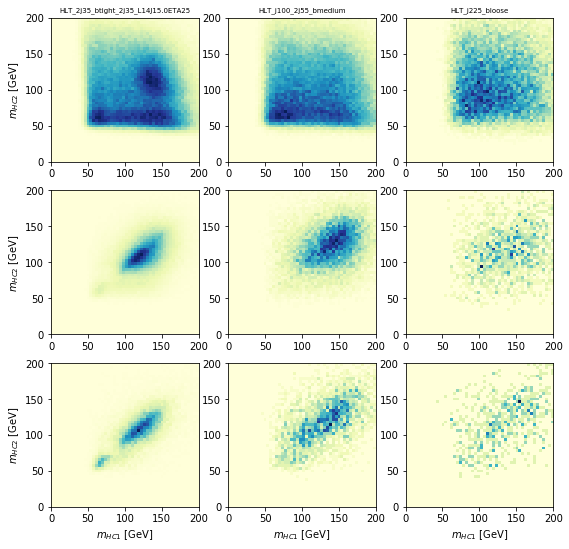

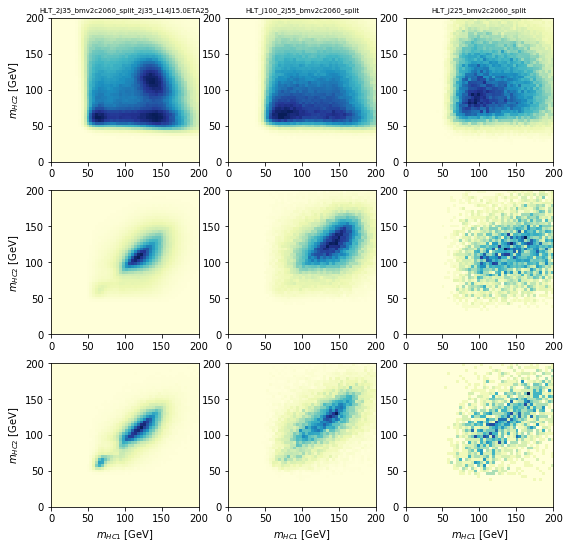

In [16]:
nb=50 
mhRanges=[(0,200)]*2

for year in [2015,2016]:
    
    print("unweighted 2b: {}".format(year))
    
    fig, axes = plt.subplots(3,3,figsize=(9,9))

    for i,ti in enumerate(triggers[year]):

        df = dfs[ti]

        for nv in [1,2,3]:

            # 2b data
            mask = (df.ntag == 2) & (df.nValidPairs == nv) 
            axes[nv-1,i].hist2d(df.loc[mask,"m_h1"],df.loc[mask,"m_h2"],
                                nb,mhRanges,cmap="YlGnBu",weights=df.loc[mask,"mc_sf"])
            if nv==3: axes[nv-1,i].set_xlabel('$m_{HC1}$ [GeV]')
            if i==0: axes[nv-1,i].set_ylabel('$m_{HC2}$ [GeV]')

        axes[0,i].set_title(ti,fontsize=7)

plt.savefig('figures/massplane_2b_{}_triggerStreams.pdf'.format(year))
        
plt.show()

### 2016

In [17]:
(210-45)/5

33.0

## Reweighted 2b plots

### 2016

**Questions:** How do these reweighted plots look in terms of the *uncalibrated* ...

## 4b plots